<a href="https://colab.research.google.com/github/yousufnzm/call-volume/blob/main/call_volume_monthly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [202]:
df = pd.read_csv('/content/data_Month.csv')
df = df.dropna()
df['Month']=pd.to_datetime(df['Month'])
df

,Month,Call Volume
0,2017-01-01,48239
1,2017-02-01,42176
2,2017-03-01,46238
3,2017-04-01,42362
4,2017-05-01,45914
5,2017-06-01,45519
6,2017-07-01,41111
7,2017-08-01,42484
8,2017-09-01,39754
9,2017-10-01,46640


In [203]:
df.set_index('Month', inplace=True)

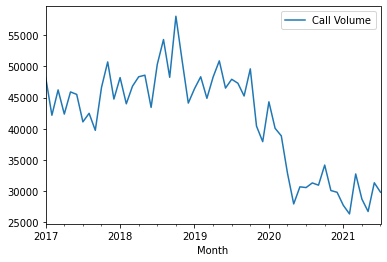

In [184]:
df.plot()

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
test_result = adfuller(df['Call Volume'])

In [19]:
#H0: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
  result = adfuller(sales)
  labels = ["ADF Test Statistics", "p-value", "#bags used", "Number of Observations Used"]
  for value, label in zip(result, labels):
    print(label+' : '+str(value))
  if result[1] <= 0.05:
    print("Strong evidence against the null hypothesis(H0). Reject the hypothesis. Data has no unit and is stationary")
  else:
    print("Weak evidecnce against the null hypothesis, time series has a unit root, inditcating it is non-stationary")

In [20]:
adfuller_test(df['Call Volume'])

ADF Test Statistics : -0.40403242696449804
p-value : 0.9094233262343839
#bags used : 2
Number of Observations Used : 52
Weak evidecnce against the null hypothesis, time series has a unit root, inditcating it is non-stationary


Differencing

In [21]:
df['First Diff Call Volume'] = df['Call Volume'] - df['Call Volume'].shift(1)

In [22]:
df.head(14)

,Call Volume,First Diff Call Volume
Month,,
2017-01-01,48239,NaN
2017-02-01,42176,-6063.0
2017-03-01,46238,4062.0
2017-04-01,42362,-3876.0
2017-05-01,45914,3552.0
2017-06-01,45519,-395.0
2017-07-01,41111,-4408.0
2017-08-01,42484,1373.0
2017-09-01,39754,-2730.0


In [25]:
df=df.dropna()

In [26]:
adfuller_test(df['First Diff Call Volume'])

ADF Test Statistics : -8.116448739072965
p-value : 1.1874334580953728e-12
#bags used : 1
Number of Observations Used : 52
Strong evidence against the null hypothesis(H0). Reject the hypothesis. Data has no unit and is stationary


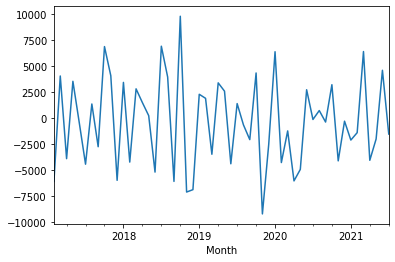

In [27]:
df['First Diff Call Volume'].plot()

Auto Regressive Model

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


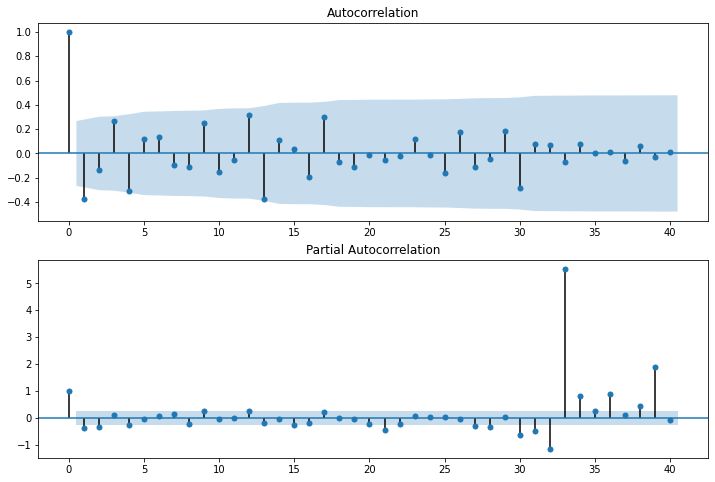

In [97]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['First Diff Call Volume'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['First Diff Call Volume'], lags=40, ax=ax2)

Model

In [165]:
from statsmodels.tsa.arima_model import ARIMA

#p=2, d=1, q=1
model = ARIMA(df['Call Volume'], order=(2,1,1))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


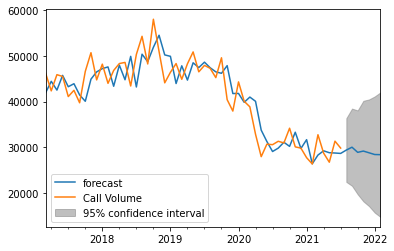

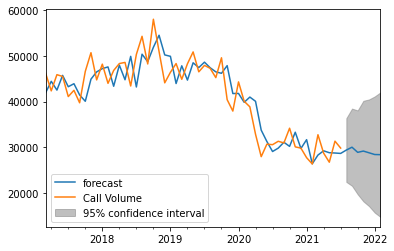

In [166]:
model_fit.plot_predict(1, 60)

In [190]:
x = model_fit.forecast(steps=5)
y = x[0]

In [204]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1] + DateOffset(months=x) for x in range(0,5)]

In [205]:
future_datest_df=pd.DataFrame(index=future_dates[1:], columns=df.columns)
future_df=pd.concat([df, future_datest_df])

In [206]:
for i in range(0, len(y)):
  future_df['Call Volume'][future_dates[i]] = y[i]

In [207]:
future_df

,Call Volume
2017-01-01,48239
2017-02-01,42176
2017-03-01,46238
2017-04-01,42362
2017-05-01,45914
2017-06-01,45519
2017-07-01,41111
2017-08-01,42484
2017-09-01,39754
2017-10-01,46640


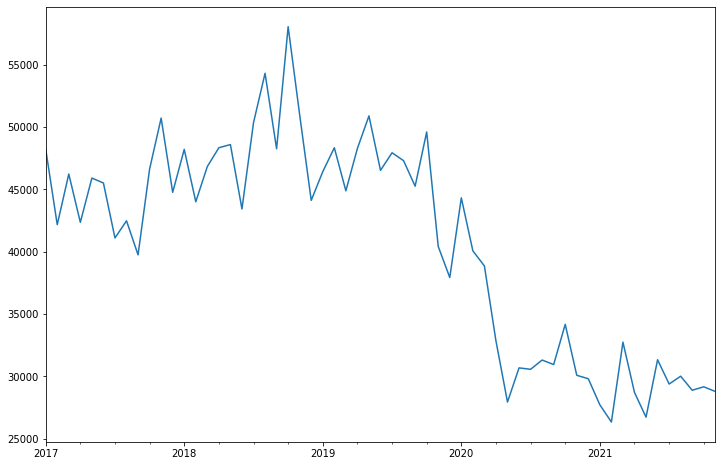

In [208]:
future_df['Call Volume'].plot(figsize=(12,8))